# Consider whether is better between using Oversampling or not
### how to compare them ... how reflected emotional label in references
* using labels of last part in reference sentencdes 
* label: #NEU #ANG #SAD #HAP #CON 


In [4]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [5]:
def plot_loss(log_path, ylim=None, MAX=-1,y_max=None):
    f = open(log_path, 'r')
    log_line = f.readlines()
    [print(log_line[i]) for i in range(23)]
    
    log_valid = [float(i.split(" ")[3].strip('\n')) for i in log_line if i.split(" ")[0] == "Valid"]
    log_train = [float(i.split(" ")[4].strip('\n')) for i in log_line if i.split(" ")[0] == "Train"]
    print("chance rate of loss : ", math.log(1/32000))
    print("initial validation loss : ", log_valid[0])
    #print(log_valid)
    log_val = log_valid[1:MAX+1]
    min_val = min(log_val)
    min_tra = min(log_train)
    [print("Minimize validation loss({}) : {} Epoch ".format(min_val, i+1)) 
           for i, l in enumerate(log_val) if l == min_val ]
    [print("Minimize training loss({}) : {} Epoch ".format(min_tra, i+1)) 
           for i, l in enumerate(log_train) if l == min_tra ]
    log_train = log_train[:MAX]
    x = np.arange(len(log_val))
    y1 = np.array(log_train)
    y2 = np.array(log_val)
    plt.figure()
    plt.plot(x,y1)
    plt.plot(x,y2)
    plt.legend()
    if ylim:
        plt.ylim(ylim[0],ylim[1])
    plt.grid()
    plt.show

# ☆ twitter 
## emotion embedding size : 64
## twitter : 21 epoch

In [42]:
log_path_em64tw =  "../../emotion_dialogue_model/log/train20190407230240.log"

No handles with labels found to put in legend.


Data directory: ../data/twitter_dial/splitted

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0407_64emoTw

Use emotion: False

Checkpoint path: None

Pretrained: False

Fix embedding: False

UNK_id: 3

dropout: 0.1

emotion_size: 64

hidden_size: 256

max_epoch: 100

decoder_learning_ratio: 1.0

learning_rate: 0.0003

batch_size: 64

lr_decay: 0.5773502691896258

max_gradient: 50.0

decay_step: 120000

EOS_id: 2

teacher_forcing_ratio: 1.0

l2_pooling: False

SOS_id: 1

num_layers: 2

chance rate of loss :  -10.373491181781864
initial validation loss :  10.3827
Minimize validation loss(5.4493) : 21 Epoch 
Minimize training loss(4.9458) : 52 Epoch 
Minimize training loss(4.9458) : 64 Epoch 


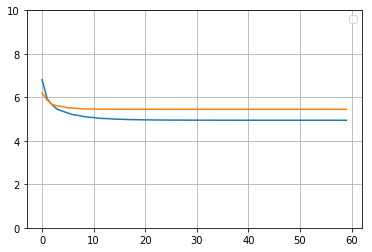

In [36]:
plot_loss(log_path_em64tw, ylim=[0,10],MAX=60)

## → oversampling all domain(em_dial) :  14 epoch

In [46]:
log_path_em64tw_overall = "../../emotion_dialogue_model/log/train20190415215339.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/over_sample/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0415_64emoTw_overall

Use emotion: True

Checkpoint path: ./model/0407_64emoTw_21.mdl

Pretrained: True

Fix embedding: False

decoder_learning_ratio: 1.0

UNK_id: 3

l2_pooling: False

teacher_forcing_ratio: 1.0

batch_size: 64

hidden_size: 256

lr_decay: 0.5773502691896258

EOS_id: 2

inf_last: False

emotion_size: 64

num_layers: 2

SOS_id: 1

max_gradient: 50.0

decay_step: 12500

learning_rate: 3e-05

PAD_id: 0

chance rate of loss :  -10.373491181781864
initial validation loss :  7.6136
Minimize validation loss(5.5844) : 14 Epoch 
Minimize training loss(2.6638) : 58 Epoch 


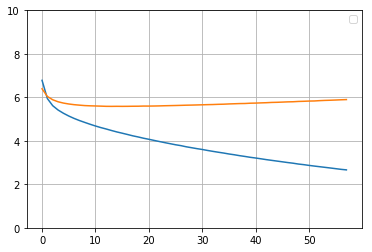

In [47]:
plot_loss(log_path_em64tw_overall,ylim=[0,10], MAX=60)

# ☆ twitter em_word of last part
##   ( emotion embedding size : 64 )
##   ( twitter 21 epoch)
## oversampling

In [55]:
log_path_64emTw21_overallEm = "../../emotion_dialogue_model/log/train20190422112408.log"

Data directory: ../data/em_dial/splitted/lastEm/over_sample/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0422_64emoTw21_overallEm

Use emotion: True

Checkpoint path: ./model/0407_64emoTw_21.mdl

Pretrained: True

Fix embedding: False

teacher_forcing_ratio: 1.0

MAX_UTTR_LEN: 50

max_gradient: 50.0

tfd_lambda: 0.4

SOS_id: 1

hidden_size: 256

num_layers: 2

PAD_id: 0

lr_decay: 0.5773502691896258

EOS_id: 2

l2_pooling: False

UNK_id: 3

emotion_size: 64

dropout: 0.1

batch_size: 64

learning_rate: 3e-05

chance rate of loss :  -10.373491181781864
initial validation loss :  11.3963
Minimize validation loss(5.1173) : 27 Epoch 
Minimize training loss(1.9274) : 94 Epoch 


No handles with labels found to put in legend.


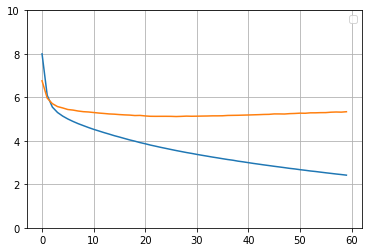

In [57]:
plot_loss(log_path_64emTw21_overallEm,ylim=[0,10], MAX=60)

## not oversampling

In [6]:
log_path_64emTw21_allEm = "../../emotion_dialogue_model/log/train20190422160108.log"

No handles with labels found to put in legend.


Data directory: ../data/em_dial/splitted/lastEm/all

Vocaburary file: ../data/twitter_dial/vocab/spvocab_tw_label.model

Model prefix: ./model/0422_64emoTw21_allEm

Use emotion: True

Checkpoint path: ./model/0407_64emoTw_21.mdl

Pretrained: True

Fix embedding: False

l2_pooling: False

max_epoch: 200

hidden_size: 256

max_gradient: 50.0

teacher_forcing_ratio: 1.0

inf_last: False

emotion_size: 64

learning_rate: 3e-05

MAX_UTTR_LEN: 50

UNK_id: 3

batch_size: 64

EOS_id: 2

decoder_learning_ratio: 1.0

SOS_id: 1

PAD_id: 0

tfd_lambda: 0.4

chance rate of loss :  -10.373491181781864
initial validation loss :  10.7792
Minimize validation loss(4.8264) : 32 Epoch 
Minimize training loss(2.0977) : 108 Epoch 


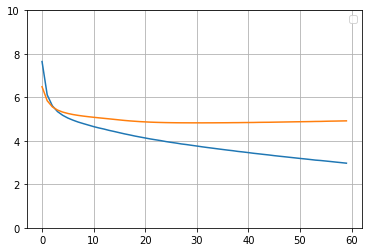

In [7]:
plot_loss(log_path_64emTw21_allEm,ylim=[0,10], MAX=60)